# Classification Assignment


## **Task has been mentioned at the end of this notebook**  

## 1. Basic Pandas Operations

In [ ]:
# Import all the required Libraries

import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Read the dataset and display the head. You will get the output as mentioned below

# ______________________________
# ______________________________
drive.mount('/content/drive',force_remount=True)
path='/content/drive/My Drive/informatics/1518854-Classification_Project (1)/Task - 4 (Apply Hyperparameter Tuning)/train.csv'
data = pd.read_csv(path)
data.head()

Mounted at /content/drive


,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,Owned,Individual,36,36,No,X1,14+,2.0,16,13320.0,0
1,33499,33500,C3,2955,Owned,Individual,66,66,No,X6,10,1.0,19,16152.0,0
2,7997,7998,C1,1542,Rented,Individual,24,24,No,NaN,3,1.0,16,7310.0,0
3,33032,33033,C26,772,Rented,Individual,75,75,No,X1,1,3.0,16,15792.0,0
4,30516,30517,C2,1510,Owned,Joint,59,58,Yes,X1,14+,4.0,17,23673.0,0


In [ ]:
# Check the shape of the dataframe

# ______________________________
# ______________________________
data.shape

(10000, 15)

In [ ]:
# On the dataframe apply info() function and observe the Dtypes and Missing Values

# ______________________________
# ______________________________
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  object 
 5   Reco_Insurance_Type      10000 non-null  object 
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  object 
 9   Health Indicator         7671 non-null   object 
 10  Holding_Policy_Duration  5946 non-null   object 
 11  Holding_Policy_Type      5946 non-null   float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

## 2. Cleaning the Data

In [ ]:
data.isnull().sum()

Unnamed: 0                    0
ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           2329
Holding_Policy_Duration    4054
Holding_Policy_Type        4054
Reco_Policy_Cat               0
Reco_Policy_Premium           0
Response                      0
dtype: int64

In [ ]:
features=['Holding_Policy_Duration','Health Indicator','Holding_Policy_Type']
for col in features:
  print(col)
  print(data[col].value_counts())
  print('------------------------')

Holding_Policy_Duration
14+    898
1      867
2      790
3      696
4      530
5      461
6      374
7      320
8      254
9      205
10     166
12     104
13     103
14      89
11      89
Name: Holding_Policy_Duration, dtype: int64
------------------------
Health Indicator
X1    2559
X2    2028
X3    1344
X4    1090
X5     343
X6     248
X7      34
X8      13
X9      12
Name: Health Indicator, dtype: int64
------------------------
Holding_Policy_Type
3.0    2573
1.0    1602
2.0     973
4.0     798
Name: Holding_Policy_Type, dtype: int64
------------------------


In [ ]:
# Impute the Null values in Health Indicator, Holding_Policy_Duration and Holding_Policy_Type

# ____________________________
# ____________________________
data['Holding_Policy_Type'].fillna(data['Holding_Policy_Type'].mean(),inplace=True)

In [ ]:
# Check again Holding_Policy_Duration is in object column convert that into int

# ____________________________
value= data['Health Indicator'].mode()[0]
for i in range(0,len(data['Health Indicator'])):
  if pd.isnull(data['Health Indicator'][i]):
    data['Health Indicator'][i]=value

for i in range(0,len(data['Holding_Policy_Duration'])):
  val=data.Holding_Policy_Duration[i]
  if val!='NaN':
    if val=='14+':
      data.Holding_Policy_Duration[i]=14
    else:
      data.Holding_Policy_Duration[i]=pd.to_numeric(data.Holding_Policy_Duration[i])
data['Holding_Policy_Duration'].fillna(data['Holding_Policy_Duration'].mean(),inplace=True)

In [ ]:
# Observe that ['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'] 
# above these Object columns have two values - Yes and No


# ____________________________
# ____________________________
# ____________________________
cols=['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'] 
for col in cols:
  print(data[col].value_counts())
  print('---------------------------------------')


Owned     5509
Rented    4491
Name: Accomodation_Type, dtype: int64
---------------------------------------
Individual    7956
Joint         2044
Name: Reco_Insurance_Type, dtype: int64
---------------------------------------
No     8318
Yes    1682
Name: Is_Spouse, dtype: int64
---------------------------------------


In [ ]:
# Converting all the Yes to 1 and No to 0. 



# Write a for loop to iterate over the list given above
# For each feature use pandas 'apply()' to convert all the 'Yes' to 1 and 'No' to 0


# ______________________________
# ______________________________
for col in cols:
  data[col]=data[col].apply(lambda x:0 if x==data[col].unique()[0] else 1)
      

In [ ]:
# Now again having a look at all those columns to see if everything went well

# _________________________________

cols=['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'] 
for col in cols:
  print(data[col].value_counts())
  print('-----------------------------------------------------')

0    5509
1    4491
Name: Accomodation_Type, dtype: int64
-----------------------------------------------------
0    7956
1    2044
Name: Reco_Insurance_Type, dtype: int64
-----------------------------------------------------
0    8318
1    1682
Name: Is_Spouse, dtype: int64
-----------------------------------------------------


In [ ]:
# Observe that all those columns are now converted from Object to Int64

# ________________________________
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  int64  
 5   Reco_Insurance_Type      10000 non-null  int64  
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  int64  
 9   Health Indicator         10000 non-null  object 
 10  Holding_Policy_Duration  10000 non-null  float64
 11  Holding_Policy_Type      10000 non-null  float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

In [ ]:
# Checking all the Object Dtypes - Here, these columns have more than 2 categories

# ______________________________
# ______________________________
for col in data.columns:
  if data[col].nunique()>2 and data[col].dtype=='object':
    print('{} dtype is: {}'.format(col,data[col].dtype))
    print('------------------------------------------------')

City_Code dtype is: object
------------------------------------------------
Health Indicator dtype is: object
------------------------------------------------


In [ ]:
# You can also do this to separate Object columns

# ____________________________
data.select_dtypes(exclude='object')

,Unnamed: 0,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,64,0,0,36,36,0,14.000000,2.000000,16,13320.0,0
1,33499,33500,2955,0,0,66,66,0,10.000000,1.000000,19,16152.0,0
2,7997,7998,1542,1,0,24,24,0,3.000000,1.000000,16,7310.0,0
3,33032,33033,772,1,0,75,75,0,1.000000,3.000000,16,15792.0,0
4,30516,30517,1510,0,1,59,58,1,14.000000,4.000000,17,23673.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5203,5204,13,0,1,47,40,1,6.115876,2.431719,19,27840.0,1
9996,35448,35449,1477,1,0,34,34,0,6.000000,1.000000,4,10560.0,0
9997,47253,47254,2357,0,0,64,64,0,8.000000,2.000000,19,14716.0,0
9998,42544,42545,1443,1,0,53,53,0,14.000000,3.000000,13,11664.0,0


In [ ]:
# Lets just try to see what is happening Response. Check the output.

data['Response'].describe()

count    10000.000000
mean         0.245900
std          0.430641
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Response, dtype: float64

In [ ]:
data['Response'].value_counts()

0    7541
1    2459
Name: Response, dtype: int64

In [ ]:
# Dropping unknown column

# Write the code here to drop unknown column and check dataframe shape
# ______________________________
# ______________________________

data.drop('Unnamed: 0',axis=1,inplace=True)

data.shape


(10000, 14)

In [ ]:
# Getting all the Object Dtypes

data.select_dtypes(include='object')

,City_Code,Health Indicator
0,C3,X1
1,C3,X6
2,C1,X1
3,C26,X1
4,C2,X1
...,...,...
9995,C3,X5
9996,C5,X1
9997,C1,X1
9998,C1,X5


In [ ]:
# Encoding the categorical features



# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

# Write the code here to use 'encoder' to convert all the categorical columns to numerical representations
# Take extra care to convert encoded numpy array to dataframe and call that data fram 'df_encoded'

# ______________________________
# ______________________________

cols=['Health Indicator','City_Code']

df_encoded=pd.get_dummies(data[cols],drop_first=True)


In [ ]:
# Concatinating the original data frame and onehot encoded dataframe

data=pd.concat([data,df_encoded],axis=1)

In [ ]:
# Drop all the unwanted columns.


# Because we have already encoded them and added to main dataframe

data.drop(cols,axis=1,inplace=True)
#data.head()

data.drop(['ID','Region_Code'],axis=1,inplace=True)

In [ ]:
y=data['Response']
x=data.drop('Response',axis=1)

## Observe that 24.59% datapoints belong to one class rest all belongs to other class. Clearly dataset is having high imbalance.

**To Do:**
1. Read about Oversampling and Undersampling.
2. Perform undersampling.

In [ ]:
'''from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

rus=RandomUnderSampler(sampling_strategy=0.5)'''


'from imblearn.under_sampling import RandomUnderSampler\nfrom imblearn.over_sampling import RandomOverSampler\n\nrus=RandomUnderSampler(sampling_strategy=0.5)'

## Train Test Split

**To Do:**
1. Sandardise the data
2. Perform 80-20 split

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_sc=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train_1,x_test,y_train_1,y_test= train_test_split(x_sc,y,test_size=0.2,random_state=123)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler(sampling_strategy=0.5)

x_train,y_train=rus.fit_resample(x_train_1,y_train_1)

------->smot

## Model Building - Logistic Regression

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance

In [ ]:
#import libriaries

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score,f1_score,roc_curve,precision_score,recall_score,classification_report,confusion_matrix

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

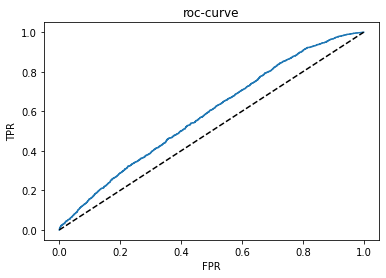

In [ ]:
y_pred=lr.predict_proba(x_train)[:,1]
fpr,tpr,threshold= roc_curve(y_train,y_pred)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.title('roc-curve')
plt.show()

## Model Building - SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc

For all the algorithms mentioned above, perform below mentioned steps.

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance
6. Compare the perormance of all the models

SVM

In [ ]:
svc= svm.SVC()
svc.fit(x_train,y_train)


SVC()

KNN neighbor classifier

In [ ]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

Decision Tree classifier

In [ ]:
clf_tree= DecisionTreeClassifier()
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier()

Random Forest Classifier

In [ ]:
rf_tree= RandomForestClassifier()
rf_tree.fit(x_train,y_train)

RandomForestClassifier()

Gradient Boost classifier

In [ ]:
gb_clf= GradientBoostingClassifier()
gb_clf.fit(x_train,y_train)

GradientBoostingClassifier()

AdaBoost Classifier

In [ ]:
adb_clf= AdaBoostClassifier()
adb_clf.fit(x_train,y_train)

AdaBoostClassifier()

Evaluation on train data

In [ ]:
accuracy=[]
F1_score=[]
Precision=[]
Recall=[]
models=[lr,svc,knn,clf_tree,rf_tree,gb_clf,adb_clf]
algos=['Logistic Regression','Support Vector Classifier','K nearest Neighbor Classifier','Decision Tree Classifier'
       ,'Random Forest Classifier','Gradient Boost Classifier','Ada Boost Classifier']
for model in models:
  accuracy.append(accuracy_score(y_train,model.predict(x_train)))
  F1_score.append(f1_score(y_train,model.predict(x_train)))
  Precision.append(precision_score(y_train,model.predict(x_train)))
  Recall.append(recall_score(y_train,model.predict(x_train)))

metric={'Algorithm':algos,'Accuracy_Score':accuracy,'f1_score':F1_score,'Precision_score':Precision,'Recall_score':Recall}
metric=pd.DataFrame(metric)
metric

,Algorithm,Accuracy_Score,f1_score,Precision_score,Recall_score
0,Logistic Regression,0.670197,0.041056,0.666667,0.021180
1,Support Vector Classifier,0.675576,0.064016,0.835443,0.033283
2,K nearest Neighbor Classifier,0.737435,0.526667,0.659833,0.438225
3,Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000
4,Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
5,Gradient Boost Classifier,0.688351,0.140871,0.868571,0.076652
6,Ada Boost Classifier,0.672214,0.066092,0.657143,0.034796


Evaluation on test data

In [ ]:
accuracy=[]
F1_score=[]
Precision=[]
Recall=[]
models=[lr,svc,knn,clf_tree,rf_tree,gb_clf,adb_clf]
algos=['Logistic Regression','Support Vector Classifier','K nearest Neighbor Classifier','Decision Tree Classifier'
       ,'Random Forest Classifier','Gradient Boost Classifier','Ada Boost Classifier']
for model in models:
  accuracy.append(accuracy_score(y_test,model.predict(x_test)))
  F1_score.append(f1_score(y_test,model.predict(x_test)))
  Precision.append(precision_score(y_test,model.predict(x_test)))
  Recall.append(recall_score(y_test,model.predict(x_test)))

metric={'Algorithm':algos,'Accuracy_Score':accuracy,'f1_score':F1_score,'Precision_score':Precision,'Recall_score':Recall}
metric=pd.DataFrame(metric)
metric

,Algorithm,Accuracy_Score,f1_score,Precision_score,Recall_score
0,Logistic Regression,0.7540,0.027668,0.233333,0.014706
1,Support Vector Classifier,0.7545,0.023857,0.222222,0.012605
2,K nearest Neighbor Classifier,0.6530,0.260128,0.264069,0.256303
3,Decision Tree Classifier,0.6320,0.346359,0.300000,0.409664
4,Random Forest Classifier,0.7135,0.168360,0.272300,0.121849
5,Gradient Boost Classifier,0.7565,0.050682,0.351351,0.027311
6,Ada Boost Classifier,0.7530,0.038911,0.263158,0.021008


In [ ]:
for model,algo in zip(models,algos):
  print(algo)
  print(confusion_matrix(y_test,model.predict(x_test)))
  print('----------------------------------------------')

Logistic Regression
[[1501   23]
 [ 469    7]]
----------------------------------------------
Support Vector Classifier
[[1503   21]
 [ 470    6]]
----------------------------------------------
K nearest Neighbor Classifier
[[1184  340]
 [ 354  122]]
----------------------------------------------
Decision Tree Classifier
[[1069  455]
 [ 281  195]]
----------------------------------------------
Random Forest Classifier
[[1369  155]
 [ 418   58]]
----------------------------------------------
Gradient Boost Classifier
[[1500   24]
 [ 463   13]]
----------------------------------------------
Ada Boost Classifier
[[1496   28]
 [ 466   10]]
----------------------------------------------


In [ ]:
for model,algo in zip(models,algos):
  print(algo)
  print(classification_report(y_test,model.predict(x_test)))
  print('----------------------------------------------')

Logistic Regression
              precision    recall  f1-score   support

           0       0.76      0.98      0.86      1524
           1       0.23      0.01      0.03       476

    accuracy                           0.75      2000
   macro avg       0.50      0.50      0.44      2000
weighted avg       0.64      0.75      0.66      2000

----------------------------------------------
Support Vector Classifier
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1524
           1       0.22      0.01      0.02       476

    accuracy                           0.75      2000
   macro avg       0.49      0.50      0.44      2000
weighted avg       0.63      0.75      0.66      2000

----------------------------------------------
K nearest Neighbor Classifier
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1524
           1       0.26      0.26      0.26       476

    accuracy

Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Logistic Regression

params= { 'penalty': ['l1', 'l2', 'elasticnet', 'none'],'solver':['lbfgs','liblinear','newton-cg','saga'],'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lr= LogisticRegression()
model_lr= GridSearchCV(estimator=lr,param_grid=params,verbose=1,return_train_score=True)

model_lr.fit(x_train,y_train)
model_lr.best_params_

Fitting 5 folds for each of 128 candidates, totalling 640 fits


{'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}

In [ ]:
#SupportVectorClassifier

params = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01,],
              'kernel': ['rbf']}

model4=svm.SVC()

model_svr=GridSearchCV(param_grid=params,estimator=model4,verbose=1,return_train_score=True)

model_svr.fit(x_train,y_train)

model_svr.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
#Decision Tree Classifier
params = {'min_samples_leaf':[i for i in range(5,100,5)],'max_depth':[1,100,5],
          'criterion':['gini','entropy'] }

model2=DecisionTreeClassifier()

model_tree=GridSearchCV(estimator=model2,verbose=1,param_grid=params,return_train_score=True)

model_tree.fit(x_train,y_train)

model_tree.best_params_

Fitting 5 folds for each of 114 candidates, totalling 570 fits


{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 35}

In [ ]:
#Random Forest Classifier

n_estimators=[1,10,100,200,500]
max_features=['auto','sqrt']
max_depth=[3,6,10,20]
min_samples_leaf=[1,2,4]

random_grid= {'n_estimators': n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_leaf': min_samples_leaf}

model3=RandomForestClassifier()

model_tree1=GridSearchCV(estimator=model3,verbose=1,param_grid=random_grid,return_train_score=True)

model_tree1.fit(x_train,y_train)

model_tree1.best_params_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 500}

In [ ]:
#Gradient Boost classifier
n_estimators=[1,10,100,200]
max_depth=[1,3,6,9]
learning_rate=[0.01,0.1,1]


#criteria=['gini','entropy']

params= {'n_estimators': n_estimators,
          'max_depth':max_depth,
          'learning_rate': learning_rate,
              }


model5=GradientBoostingClassifier()

model_gb=GridSearchCV(param_grid=params,estimator=model5,verbose=1,return_train_score=True)

model_gb.fit(x_train,y_train)

model_gb.best_params_



Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [ ]:
#Ada Boost Classifier

n_estimators=[1,10,100,200,500]
learning_rate=[0.01,0.1,1,10,100]
algorithms = ['SAMME', 'SAMME.R']

params= {'n_estimators': n_estimators,
              'algorithm':algorithms,
              'learning_rate': learning_rate,}

model6 = AdaBoostClassifier()

model_svr=GridSearchCV(param_grid=params,estimator=model6,verbose=1,return_train_score=True)

model_svr.fit(x_train,y_train)

model_svr.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 500}

In [ ]:
lr1= LogisticRegression(C=0.001,penalty='l2',solver='lbfgs')
lr1.fit(x_train,y_train)


svc1= svm.SVC(C=0.1,gamma=1, kernel='rbf')
svc1.fit(x_train,y_train)


knn1= KNeighborsClassifier()
knn1.fit(x_train,y_train)


clf_tree1= DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=80)
clf_tree1.fit(x_train,y_train)



rf_tree1= RandomForestClassifier(max_depth=20,max_features='auto',min_samples_leaf=2,n_estimators=500)
rf_tree1.fit(x_train,y_train)



gb_clf1= GradientBoostingClassifier(learning_rate=1,max_depth=6,max_features='auto',n_estimators=1)
gb_clf1.fit(x_train,y_train)




adb_clf1= AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.1,n_estimators=200)
adb_clf1.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200)

In [ ]:
accuracy=[]
F1_score=[]
Precision=[]
Recall=[]
models=[lr1,svc1,knn1,clf_tree1,rf_tree1,gb_clf1,adb_clf1]
algos=['Logistic Regression','Support Vector Classifier','K nearest Neighbor Classifier','Decision Tree Classifier'
       ,'Random Forest Classifier','Gradient Boost Classifier','Ada Boost Classifier']
for model in models:
  accuracy.append(accuracy_score(y_train,model.predict(x_train)))
  F1_score.append(f1_score(y_train,model.predict(x_train)))
  Precision.append(precision_score(y_train,model.predict(x_train)))
  Recall.append(recall_score(y_train,model.predict(x_train)))

metric={'Algorithm':algos,'Accuracy_Score':accuracy,'f1_score':F1_score,'Precision_score':Precision,'Recall_score':Recall}
metric=pd.DataFrame(metric)
metric

,Algorithm,Accuracy_Score,f1_score,Precision_score,Recall_score
0,Logistic Regression,0.667507,0.007028,0.777778,0.003530
1,Support Vector Classifier,0.666667,0.000000,0.000000,0.000000
2,K nearest Neighbor Classifier,0.737435,0.526667,0.659833,0.438225
3,Decision Tree Classifier,0.671373,0.126062,0.555118,0.071104
4,Random Forest Classifier,0.756598,0.424940,1.000000,0.269793
5,Gradient Boost Classifier,0.682131,0.209779,0.612195,0.126576
6,Ada Boost Classifier,0.668011,0.009032,0.900000,0.004539


In [ ]:
accuracy=[]
F1_score=[]
Precision=[]
Recall=[]
models=[lr1,svc1,knn1,clf_tree1,rf_tree1,gb_clf1,adb_clf1]
algos=['Logistic Regression','Support Vector Classifier','K nearest Neighbor Classifier','Decision Tree Classifier'
       ,'Random Forest Classifier','Gradient Boost Classifier','Ada Boost Classifier']
for model in models:
  accuracy.append(accuracy_score(y_test,model.predict(x_test)))
  F1_score.append(f1_score(y_test,model.predict(x_test)))
  Precision.append(precision_score(y_test,model.predict(x_test)))
  Recall.append(recall_score(y_test,model.predict(x_test)))

metric={'Algorithm':algos,'Accuracy_Score':accuracy,'f1_score':F1_score,'Precision_score':Precision,'Recall_score':Recall}
metric=pd.DataFrame(metric)
metric

,Algorithm,Accuracy_Score,f1_score,Precision_score,Recall_score
0,Logistic Regression,0.7615,0.004175,0.333333,0.002101
1,Support Vector Classifier,0.7620,0.000000,0.000000,0.000000
2,K nearest Neighbor Classifier,0.6530,0.260128,0.264069,0.256303
3,Decision Tree Classifier,0.7605,0.094518,0.471698,0.052521
4,Random Forest Classifier,0.7610,0.051587,0.464286,0.027311
5,Gradient Boost Classifier,0.7470,0.178571,0.392857,0.115546
6,Ada Boost Classifier,0.7615,0.004175,0.333333,0.002101
